In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
import matplotlib.pyplot as plt

# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train2.csv", encoding='latin-1')
test = pd.read_csv("test2.csv", encoding='latin-1')

# making copies of train and test dataset
train = train.copy()
test = test.copy()

train.head()


,Date,Invoice ID,Product Line,BILLUNIT,Item_Type,BILLQTY,BILLRATE,BASEUNIT,BASEQTY,BASERATE,AMOUNT,TAXABLE,VAT,Total,DIVISION
0,26/07/2021,SI478-BNY-78/79,KAACH CHURA SET 'B',PC,Dairy,1,39.823009,PC,1,39.823009,39.823009,39.823009,5.176991,45.000000,Maitidevi
1,26/07/2021,SI479-BNY-78/79,DABUR HONEY 1KG,PC,Soft Drinks,1,566.371681,PC,1,566.371681,566.371681,566.371681,73.628319,640.000000,Maitidevi
2,26/07/2021,SI480-BNY-78/79,KAVERI MEHENDI,PC,Meat,1,15.044248,PC,1,15.044248,15.044248,15.044248,1.955752,17.000000,Maitidevi
3,26/07/2021,SI480-BNY-78/79,SCAP BEND,PC,Fruits and Vegetables,1,53.097345,PC,1,53.097345,53.097345,53.097345,6.902655,60.000000,Maitidevi
4,26/07/2021,SI480-BNY-78/79,KOOL MANGO FRUTI 200ML,PC,Household,2,17.699120,PC,2,17.699120,35.398240,35.398240,4.601771,40.000011,Maitidevi


In [3]:
train.describe()

,BILLQTY,BILLRATE,BASEQTY,BASERATE,AMOUNT,TAXABLE,VAT,Total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.496000,94.696460,1.496000,94.696460,120.671584,114.168319,14.841881,135.453200
std,1.477216,132.411010,1.477216,132.411010,214.743471,215.044985,27.955848,242.255300
min,1.000000,4.424779,1.000000,4.424779,-221.238938,-221.238938,-28.761062,-250.000000
25%,1.000000,22.123894,1.000000,22.123894,34.513274,26.548673,3.451327,38.000001
50%,1.000000,56.637168,1.000000,56.637168,70.796460,66.371681,8.628319,80.000000
75%,1.000000,115.044250,1.000000,115.044250,132.743363,123.893805,16.106195,149.999998
max,25.000000,2168.141593,25.000000,2168.141593,4336.283186,4336.283186,563.716814,4900.000000


In [4]:
test.describe()

,BILLQTY,BILLRATE,BASEQTY,BASERATE,AMOUNT,TAXABLE,VAT,Total
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.499499,93.470061,1.499499,93.470061,111.651334,103.716371,13.483128,125.028382
std,1.806177,170.056941,1.806177,170.056941,185.005814,185.171038,24.072235,208.501599
min,1.000000,4.424779,1.000000,4.424779,-296.460177,-296.460177,-38.539823,-335.000000
25%,1.000000,26.548673,1.000000,26.548673,35.398230,28.761062,3.738938,40.000000
50%,1.000000,53.097345,1.000000,53.097345,66.371681,57.522124,7.477876,75.000000
75%,1.000000,115.044248,1.000000,115.044248,123.893805,119.469026,15.530973,140.000000
max,30.000000,2743.362832,30.000000,2743.362832,2743.362832,2743.362832,356.637168,3100.000000


In [5]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(2000, 15)


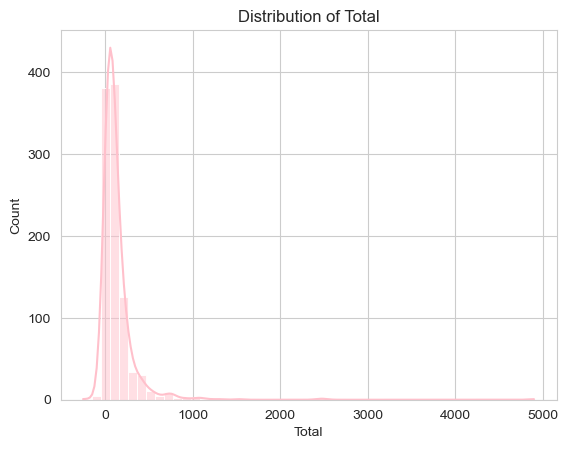

In [6]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create the histogram using seaborn
sns.histplot(train['Total'], bins=50, color='pink', kde=True)

# Set plot title and labels
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
# checking the columns of the train set

print(train.columns)

In [ ]:
train.dtypes

In [ ]:
# checking the different items in Item Idemtifier

train['Invoice ID'].value_counts()


In [ ]:
# we will analyze only the training set

train['Invoice ID'].value_counts(normalize = True)
train['Invoice ID'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Invoice ID')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [ ]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


In [ ]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Identifier

train['DIVISION'].value_counts()

In [ ]:
# we will analyze only the training set

train['DIVISION'].value_counts(normalize = True)
train['DIVISION'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Division')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Size

train['DIVISION'].value_counts()

In [ ]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))